# Image Compression

A grayscale image is just a matrix where the numbers represent the intensity of a given pixel, such a matrix can be decomposed just like any other matrix using Singular Value Decomposition (SVD).

SVD is a matrix decomposition method for reducing a matrix to its constituent parts in order to make certain subsequent matrix calculations simpler.

For the case of simplicity we will focus on the SVD for real-valued matrices and ignore the case for complex numbers.
$A = U . \Sigma . V^T$

Where A is the real m x n matrix that we wish to decompose, U is an m x m matrix, Sigma ($\Sigma$) is an m x n diagonal matrix, and $V^T$ is the  transpose of an n x n matrix where T is a superscript.

The SVD can be calculated by calling python svd() function.

The function takes a matrix and returns the U, $\Sigma$ and $V^T$ elements. The Sigma diagonal matrix is returned as a vector of singular values. The V matrix is returned in a transposed form.

The original matrix can be reconstructed from the U, Sigma, and V^T elements. And if you took $r$ columns from U to make $\hat{U}$, and $r$ elements from Sigma to make $\hat{\Sigma}$ and $r$ rows from V^T to make $\hat{V}^T$, you can approximate the original matrix using $\hat{U} . \hat{\Sigma} . \hat{V}^T$

In this notebook, you will approximate a grayscale image using $r$ singular values and singular vectors from the U, Sigma and V^T matrices; hence, you compress the image into $2r$ rows and $r$ scalars only.

## Load the image

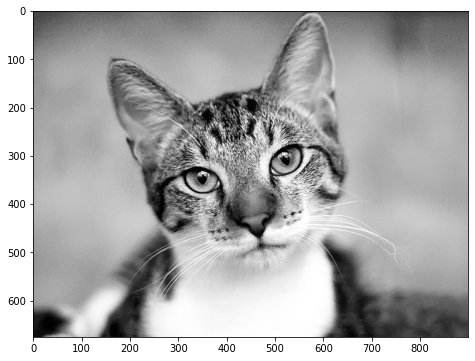

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
from PIL import Image

#load an image and convert it to black and white.
img = Image.open('Domestic-feline-tabby-cat.jpg')
imggray = img.convert('LA')
plt.figure(figsize=(9, 6))
plt.imshow(imggray);

## Convert the image to numpy array

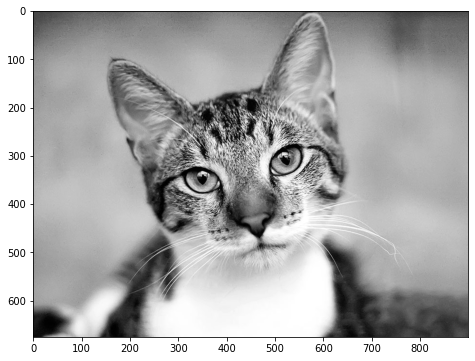

In [2]:
#convert the image data into a numpy matrix, plotting the result to show the data is unchanged.
img = np.asarray(imggray)[:,:,0]
plt.figure(figsize=(9,6))
plt.imshow(img, cmap='gray');

## Compute SVD of the image

In [3]:
u,s,v = np.linalg.svd(img)
sd = np.zeros_like(u, dtype = 'float')
sd = np.diag(s)
us = u @ sd

## Check if you can reconstruct the image again

Plot the image

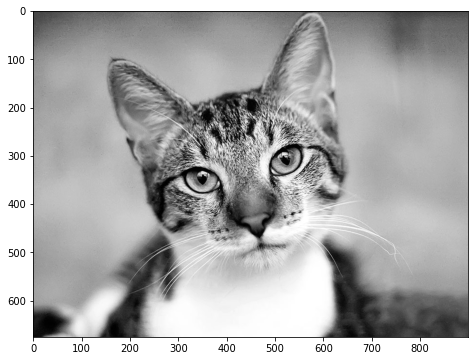

In [4]:
ranks_sum = us[:,:675] @ v[:675,:]

plt.figure(figsize=(9,6))    
plt.imshow(ranks_sum, cmap='gray')

## Reconstruct the image using $r = 1$

Plot the reconstructed image

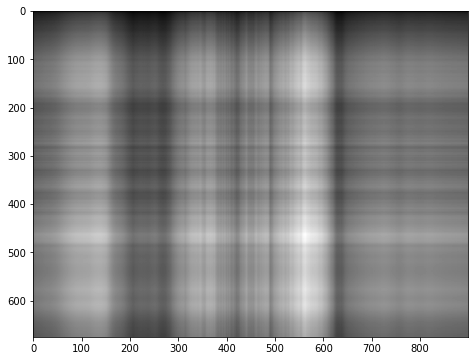

In [5]:
ranks_sum = us[:,:1] @ v[:1,:]

plt.figure(figsize=(9,6))    
plt.imshow(ranks_sum, cmap='gray')

## Reconstruct the image using $r = 2 \rightarrow 50$

Plot the reconstructed images

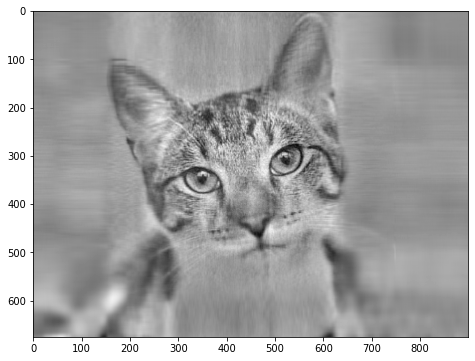

In [6]:
ranks_sum = us[:,2:50] @ v[2:50,:]

plt.figure(figsize=(9,6))    
plt.imshow(ranks_sum, cmap='gray')

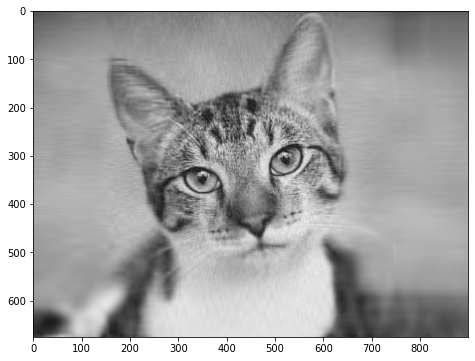

In [7]:
ranks_sum = us[:,:50] @ v[:50,:]

plt.figure(figsize=(9,6))    
plt.imshow(ranks_sum, cmap='gray')

In [8]:
import numpy as np 
x1 = np.linspace(-5,5,100)
x2 = np.linspace(-5,5,100)

X, Y = np.meshgrid(x1, x2)

print(X[-2:-1, :])
print(Y[-2:-1, :])

[[-5.         -4.8989899  -4.7979798  -4.6969697  -4.5959596  -4.49494949
  -4.39393939 -4.29292929 -4.19191919 -4.09090909 -3.98989899 -3.88888889
  -3.78787879 -3.68686869 -3.58585859 -3.48484848 -3.38383838 -3.28282828
  -3.18181818 -3.08080808 -2.97979798 -2.87878788 -2.77777778 -2.67676768
  -2.57575758 -2.47474747 -2.37373737 -2.27272727 -2.17171717 -2.07070707
  -1.96969697 -1.86868687 -1.76767677 -1.66666667 -1.56565657 -1.46464646
  -1.36363636 -1.26262626 -1.16161616 -1.06060606 -0.95959596 -0.85858586
  -0.75757576 -0.65656566 -0.55555556 -0.45454545 -0.35353535 -0.25252525
  -0.15151515 -0.05050505  0.05050505  0.15151515  0.25252525  0.35353535
   0.45454545  0.55555556  0.65656566  0.75757576  0.85858586  0.95959596
   1.06060606  1.16161616  1.26262626  1.36363636  1.46464646  1.56565657
   1.66666667  1.76767677  1.86868687  1.96969697  2.07070707  2.17171717
   2.27272727  2.37373737  2.47474747  2.57575758  2.67676768  2.77777778
   2.87878788  2.97979798  3.08080808 